##Mask Detection


---


**Objective:** The goal of this project is to build a model that can detect whether a person is wearing a mask or not. You would be downloading the data from kaggle and then building you model while we guide you through the steps.


##Getting the Data

We start by getting the data. The data that we want is on kaggle and you can access it through this link: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 99% 162M/163M [00:07<00:00, 28.1MB/s]
100% 163M/163M [00:07<00:00, 23.3MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('face-mask-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('face-mask-dataset')

##Importing the Libraries

Now, it is time to import the libraries that we need.

In [ ]:
import os
import shutil
import random
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import cv2

If we look at the data that we extracted, we can see that it is located in 2 folders: with_mask and without_mask. What we need to do now, is to create a hierarchy of folders that would help us specify the training, validation, and testing data. In order to do this you have to use the **os** and the **shutil** libraries that would help you creating folders, and moving images from a folder to another. In simple terms, the libraries helps you perform the same things that you do on your computer with your operating system, but in a programmatic way.

The initial dataset contains a lot of images belonging to the 2 classes, what we will do is randomly sample from this dataset so that we reduce the training and the tuning time.

We need to have in our final directories the following:
* Training: 500 images "with_mask", and 500 images "without_mask"
* Validation: 100 images "with_mask", and 100 images "without_mask"
* Testing: 50 images "with_mask", and 50 images "without_mask"

In [ ]:
!ls face-mask-dataset

original_with_mask_dir = 'face-mask-dataset/data/with_mask'
original_without_mask_dir = 'face-mask-dataset/data/without_mask'

base_dir = 'dataset'

folders = ['train', 'validation', 'test']
categories = ['with_mask', 'without_mask']

data


In [ ]:
for folder in folders:
    for category in categories:
        path = os.path.join(base_dir, folder, category)
        os.makedirs(path, exist_ok=True)

In [ ]:
def distribute_images(src_dir, dest_base_dir, category):
    images = os.listdir(src_dir)
    random.shuffle(images)

    train_images = images[:500]
    val_images = images[500:600]
    test_images = images[600:650]

    for image_set, folder in [(train_images, 'train'), (val_images, 'validation'), (test_images, 'test')]:
        dest_dir = os.path.join(dest_base_dir, folder, category)
        for image_name in image_set:
            src = os.path.join(src_dir, image_name)
            dst = os.path.join(dest_dir, image_name)
            shutil.copyfile(src, dst)

distribute_images(original_with_mask_dir, base_dir, 'with_mask')
distribute_images(original_without_mask_dir, base_dir, 'without_mask')

for folder in folders:
    for category in categories:
        path = os.path.join(base_dir, folder, category)
        print(f"{path}: {len(os.listdir(path))} files")

dataset/train/with_mask: 500 files
dataset/train/without_mask: 500 files
dataset/validation/with_mask: 100 files
dataset/validation/without_mask: 100 files
dataset/test/with_mask: 50 files
dataset/test/without_mask: 50 files


##Inspecting the Dataset

Now we will see some characteristics of our dataset.

In [ ]:
training_path = os.path.join(base_dir, 'train')
validation_path = os.path.join(base_dir, 'validation')
testing_path = os.path.join(base_dir, 'test')

In [ ]:
for category in categories:
    path = os.path.join(training_path, category)
    print(f"{category}: {len(os.listdir(path))} files")

with_mask: 500 files
without_mask: 500 files


In [ ]:
for category in categories:
    path = os.path.join(validation_path, category)
    print(f"{category}: {len(os.listdir(path))} files")

with_mask: 100 files
without_mask: 100 files


In [ ]:
for category in categories:
    path = os.path.join(testing_path, category)
    print(f"{category}: {len(os.listdir(path))} files")

with_mask: 50 files
without_mask: 50 files


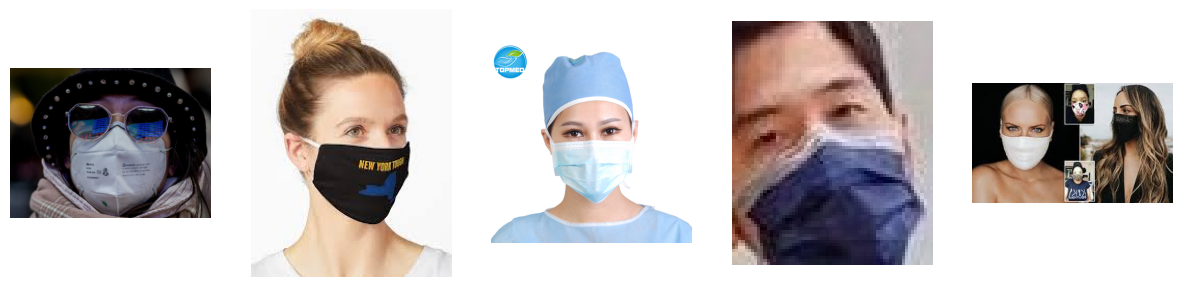

In [ ]:
import random
import matplotlib.pyplot as plt

with_mask_dir = os.path.join(training_path, 'with_mask')

with_mask_images = os.listdir(with_mask_dir)

fig, axs = plt.subplots(1, 5, figsize=(15, 5))

for i in range(5):
    image_path = os.path.join(with_mask_dir, random.choice(with_mask_images))
    image = plt.imread(image_path)
    axs[i].imshow(image)
    axs[i].axis('off')

plt.show()

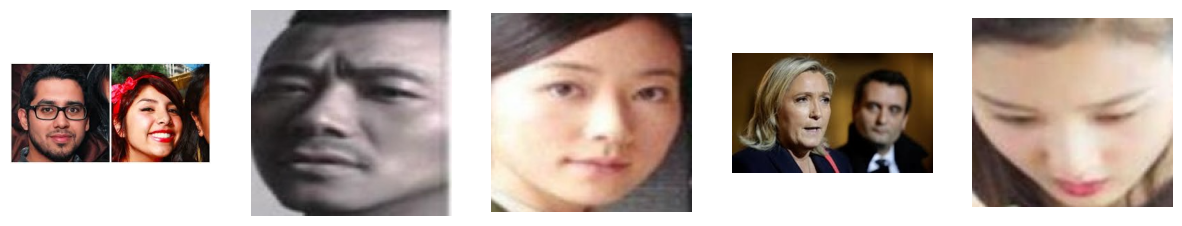

In [ ]:
import random
import matplotlib.pyplot as plt

without_mask_dir = os.path.join(training_path, 'without_mask')

without_mask_images = os.listdir(without_mask_dir)

fig, axs = plt.subplots(1, 5, figsize=(15, 5))

for i in range(5):
    image_path = os.path.join(without_mask_dir, random.choice(without_mask_images))
    image = plt.imread(image_path)
    axs[i].imshow(image)
    axs[i].axis('off')

plt.show()

##Modeling

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Input(shape=(150, 150, 3)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    training_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    validation_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    testing_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[lr_scheduler]
)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.6417 - loss: 0.5947 - val_accuracy: 0.7865 - val_loss: 0.4630 - learning_rate: 0.0010
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7500 - loss: 0.5977 - val_accuracy: 0.8750 - val_loss: 0.2361 - learning_rate: 0.0010
Epoch 3/20


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


31/31 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.8649 - loss: 0.3485 - val_accuracy: 0.8906 - val_loss: 0.2739 - learning_rate: 0.0010
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7188 - loss: 0.5105 - val_accuracy: 1.0000 - val_loss: 0.1489 - learning_rate: 0.0010
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.8822 - loss: 0.2803 - val_accuracy: 0.8646 - val_loss: 0.3481 - learning_rate: 0.0010
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7500 - loss: 0.6058 - val_accuracy: 0.6250 - val_loss: 0.4283 - learning_rate: 0.0010
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.8859 - loss: 0.2469 - val_accuracy: 0.9375 - val_loss: 0.2108 - learning_rate: 0.0010
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9062 - loss: 0.2389 - val_accuracy: 0.7500 - val_loss: 0.3176 - learning_rate: 0.0010
Epoch 9/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9117 - loss: 0.1828
Epoch 9: ReduceLROnPlateau r

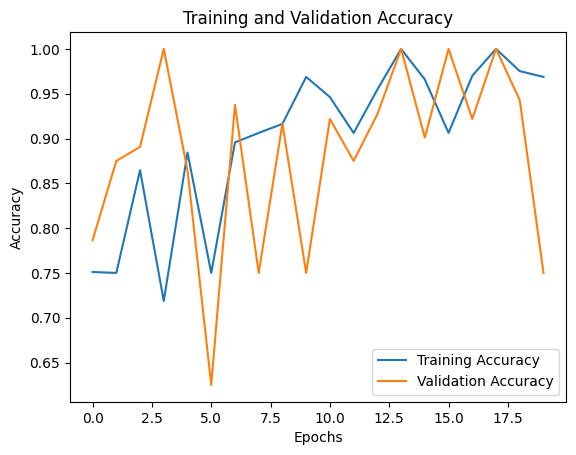

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.show()

The model is overfitting as the training accuracy continues to increase while the validation accuracy starts to decrease after around 8 epochs.
This indicates that the model is learning the training data too well and is not generalizing well to unseen data.

##Evaluate the model


In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 270ms/step - accuracy: 0.8989 - loss: 0.3375
Test Accuracy: 88.00%


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_generator.classes, np.round(model.predict(test_generator)))
print(cm)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 290ms/step
[[46  4]
 [ 8 42]]


The model has an accuracy of 88%, with high precision (92%) but lower recall (85.2%). This means it’s good at predicting negatives but misses some positives.

##Error Analysis

Now we need to see for each of the images that we have in our testing set, what did the model predict. This helps us analyze the errors and try to think why the model predicted some things in the wrong way.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


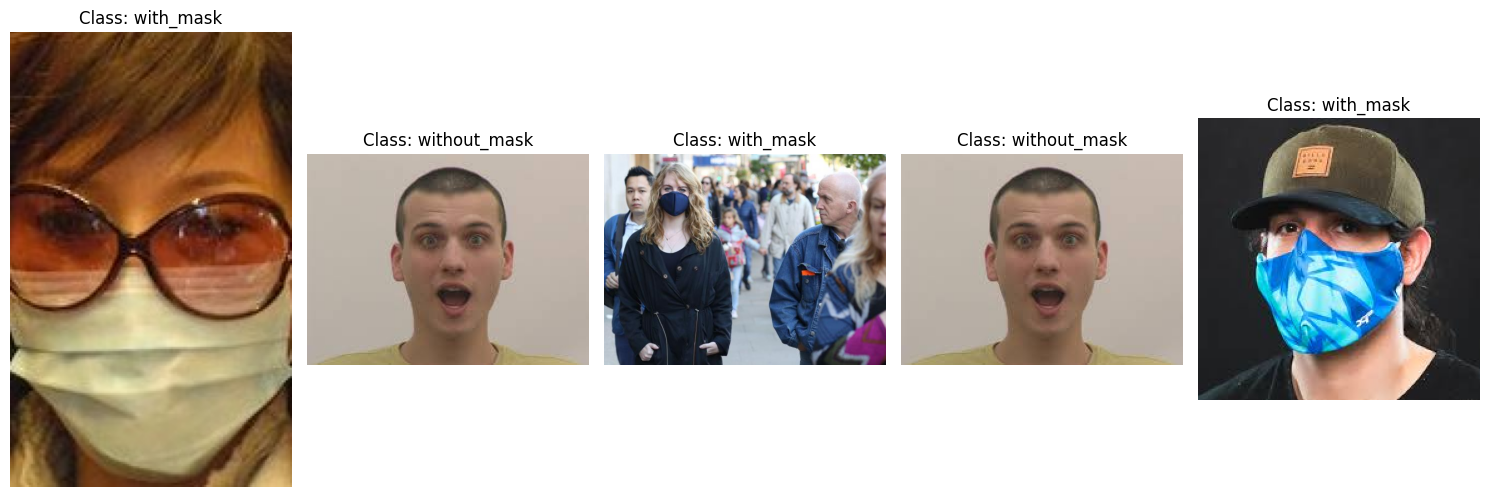

In [ ]:
import random
import matplotlib.pyplot as plt
import os

test_images, test_labels = next(test_generator)
predictions = model.predict(test_images)

fig, axs = plt.subplots(1, 5, figsize=(15, 5))

for i in range(5):
    random_category = random.choice(categories)
    category_path = os.path.join(testing_path, random_category)
    image_name = random.choice(os.listdir(category_path))
    image_path = os.path.join(category_path, image_name)
    image = plt.imread(image_path)
    axs[i].imshow(image)
    axs[i].axis('off')
    axs[i].set_title(f"Class: {random_category}")

plt.tight_layout()
plt.show()


The wrong predictions could be due to the model overfitting to specific features in the training data or struggling with ambiguous images, such as partial masks or low-quality inputs. Additionally, data imbalance or edge cases where masks are worn in non-standard ways could also contribute to misclassifications.

To improve the model, we can use data augmentation by applying random transformations like rotations and flips to the training images, helping the model learn from more varied data. This helps the model generalize better and avoid overfitting by seeing different versions of the same object.

Different accuracies across different sets may result from factors like random initialization of model weights, changes in how the data is split, or variations in random processes during training (such as data shuffling or batch order). To ensure consistent comparisons, it’s crucial to set a fixed random seed for reproducibility.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    training_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary",
    shuffle=True,
)

validation_generator = validation_datagen.flow_from_directory(
    validation_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary",
    shuffle=True,
)

test_generator = test_datagen.flow_from_directory(
    testing_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary",
    shuffle=False,
)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[lr_scheduler],
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.8244 - loss: 0.4757 - val_accuracy: 0.9271 - val_loss: 0.2307 - learning_rate: 5.0000e-04
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9062 - loss: 0.2928 - val_accuracy: 0.8750 - val_loss: 0.2256 - learning_rate: 5.0000e-04
Epoch 3/20


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


31/31 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.8410 - loss: 0.3561 - val_accuracy: 0.9219 - val_loss: 0.2443 - learning_rate: 5.0000e-04
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 177ms/step - accuracy: 0.8750 - loss: 0.4039 - val_accuracy: 1.0000 - val_loss: 0.2002 - learning_rate: 5.0000e-04
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.8669 - loss: 0.3180 - val_accuracy: 0.9167 - val_loss: 0.2240 - learning_rate: 5.0000e-04
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7500 - loss: 0.4857 - val_accuracy: 0.8750 - val_loss: 0.2494 - learning_rate: 5.0000e-04
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.8404 - loss: 0.3701 - val_accuracy: 0.9323 - val_loss: 0.2067 - learning_rate: 5.0000e-04
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8438 - loss: 0.2749 - val_accuracy: 1.0000 - val_loss: 0.0659 - learning_rate: 5.0000e-04
Epoch 9/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.8409 - loss: 0.3276 -